## Python Numpy 선형대수

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


In [1]:
#정방행렬/정사각형 행렬 : 같은 수의 행과 열을 갖는 행렬(nxn 행렬)
import numpy as np
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [2]:
# 대각 정방행렬 : 주대각선 원소 외에 모두 0인 정방행렬
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [3]:
# 항등행렬/단위행렬(unit matrix) : 주대각선 원소가 모두 1이고 나머지는 0인 정방행렬
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

벡터와 행렬의 연산
- 벡터/행렬의 덧셈과 뺄셈 : 같은 위치에 있는 원소끼리 수행. 요소별 연산
- 스칼라와 벡터/행렬의 곱셈
- 브로드캐스팅 : 스칼라를 벡터로 변환한 연산을 허용
- 벡터와 벡터의 곱셈. 내적
 - 두 벡터의 차원(길이)이 같아야 한다.
 - 앞의 벡터가 행벡터이고 위의 벡터가 열벡터여야 한다.
 - 내적의 결과는 스칼라 값이 됨. dot() 또는 @ 연산자로 계산


In [7]:
x = np.array([10,11,12,13,14])
y = np.array([0,1,2,3,4])
x+y

array([10, 12, 14, 16, 18])

In [8]:
x*y

array([ 0, 11, 24, 39, 56])

In [9]:
x1 = np.array([10,11,12])
np.dot(3,x1)

array([30, 33, 36])

행렬 곱을 이용하여 신경망에 적용
<img src = '행렬곱.jpg'>

In [10]:
x = np.arange(1,7).reshape(2,3)
y = np.array([[6,23],[-1,7],[5,3]])
np.dot(x,y)

array([[ 19,  46],
       [ 49, 145]])

In [11]:
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]]).T
np.dot(x,y)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [12]:
# 1차원 ndarray는 전치연산이 정의되지 않는다
x = np.array([1,2,3])
y = np.array([4,5,6])

x@ y

32

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


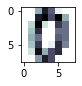

In [13]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

digits = load_digits()
d1 = digits.images[0]
print(d1)
v1 = d1.reshape(64,1)
plt.figure(figsize = (1,1))
plt.imshow(d1,aspect=1,interpolation = 'nearest',cmap=plt.cm.bone_r)

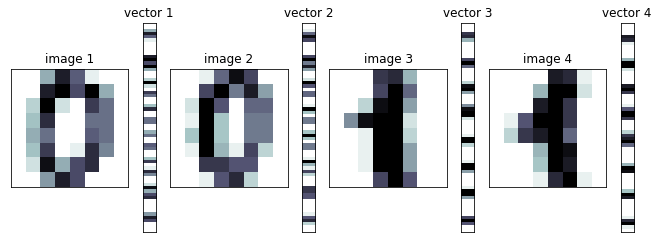

In [14]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Master\scikit_learn_data


Text(0.5, 1.0, 'image 3:$0.7x_1+0.3x_2$')

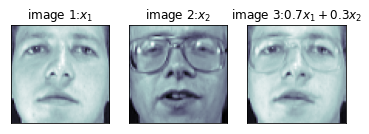

In [16]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6],cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1:$x_1$")

ax[1].imshow(faces.images[10],cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2:$x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face,cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3:$0.7x_1+0.3x_2$")

In [ ]:
# 행렬간 곱셈 